In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

# Keşifsel Veri Analizi

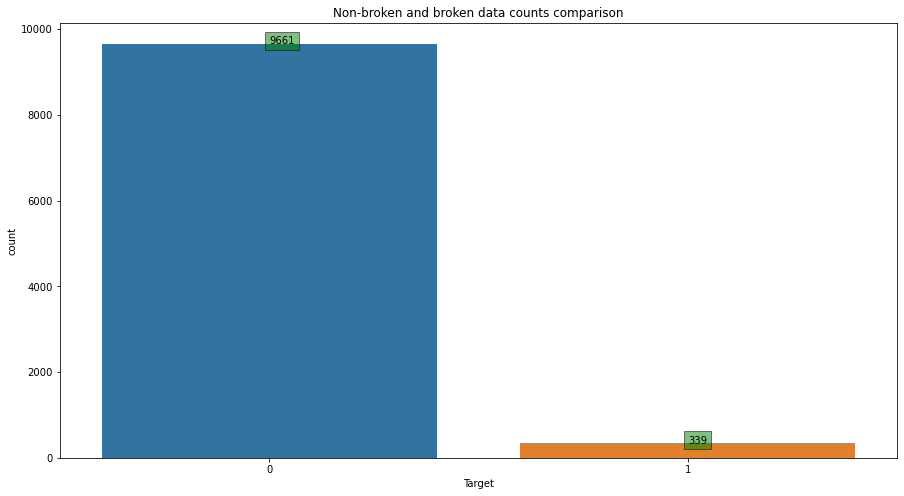

In [6]:
plt.figure(figsize=(15,8))
g=sns.countplot(x='Target', data=df)
for i, u in enumerate(df['Target'].value_counts().values):
    g.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Non-broken and broken data counts comparison')
plt.show()

In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
def hist_and_bar_plot(x, savefig = False, namefig = ""):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 3))
    sns.histplot(data=df, x=x, kde=True, ax=ax1)
    sns.boxplot(data=df, x=x, ax=ax2)
    if savefig:
        if namefig:
            namefig = '-'.join(map(lambda x: str(x).lower(), namefig.split()))
        else:
            namefig = f"figure-{random.randint(1, 1000)}"
        fullpath = 'figures/' + namefig
        plt.savefig(fullpath)
        print(f'figure saved as {namefig}.png')
    plt.show()

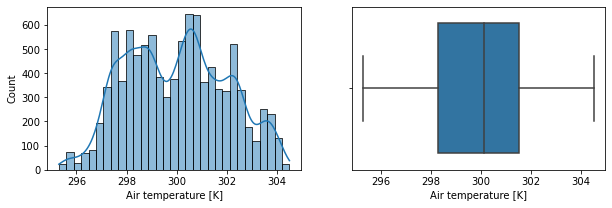

In [9]:
hist_and_bar_plot('Air temperature [K]', namefig="Air temperature")

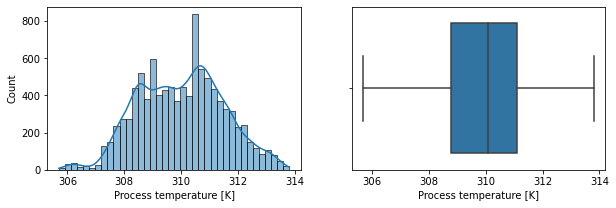

In [10]:
hist_and_bar_plot('Process temperature [K]', False, 'Process temperature')

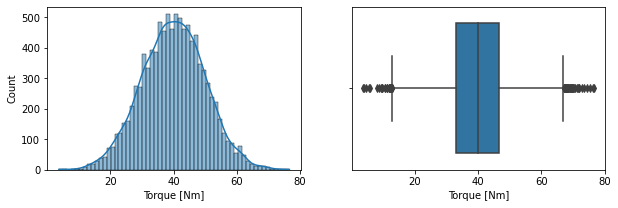

In [11]:
hist_and_bar_plot('Torque [Nm]', namefig='Torque')

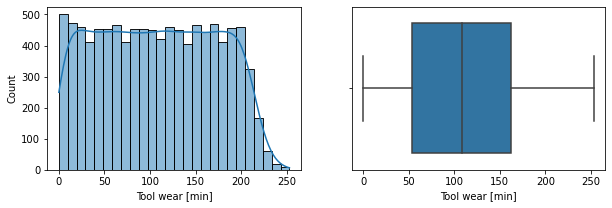

In [12]:
hist_and_bar_plot('Tool wear [min]', False, 'tool wear')

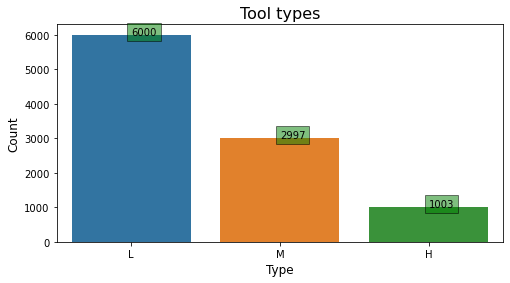

In [13]:
plt.figure(figsize=(8,4))
h=sns.countplot(x='Type', data=df, order=['L', 'M', 'H'])
for i, u in enumerate(df['Type'].value_counts().values):
    h.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Tool types', fontsize=16)
# plt.savefig('figures/tool-types.png')
plt.show()

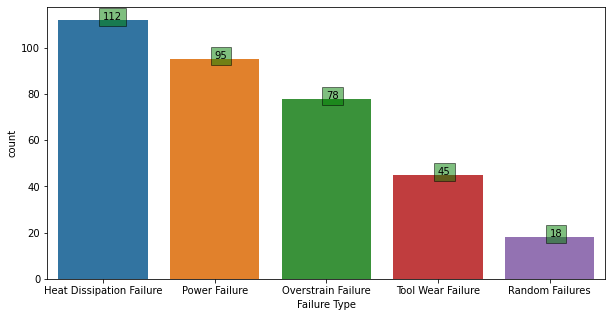

In [14]:
plt.figure(figsize=(10, 5))
failures = df[df['Failure Type'] != 'No Failure']
hg = sns.countplot(
    x='Failure Type',
    data=failures,
    order=[
        'Heat Dissipation Failure',
        'Power Failure',
        'Overstrain Failure',
        'Tool Wear Failure',
        'Random Failures'
    ]
)

for i, u in enumerate(failures['Failure Type'].value_counts().values):
    hg.text(i, u, str(u), bbox={'facecolor': 'green', 'alpha': 0.5})
# plt.savefig('figures/failure-types')
plt.show()

## Relation between features

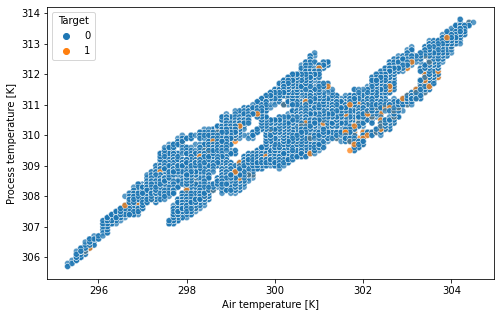

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Air temperature [K]',
    y='Process temperature [K]',
    data=df,
    hue='Target',
    alpha=0.75
)
# plt.savefig('figures/scatter-air-temperature')
plt.show()

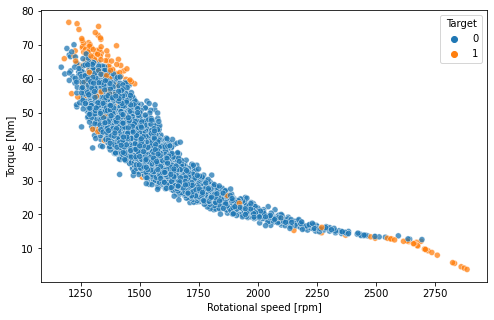

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    data=df,
    hue='Target',
    alpha=0.75
)
# plt.savefig('figures/scatter-torque-rotational')
plt.show()

In [17]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Verileri Temizleme

Because the UDI and Product Id will not be useful neither in the classification and analysis, we drop both of them  

In [18]:
df.drop(df.columns[:2], axis=1, inplace=True)

We also want to drop the Target col because in this project we only use Failure Type for the classification

In [19]:
df.drop('Target', axis=1, inplace=True)

In [20]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


# Veri Ön İşleme

Use LabelEncoder to change Failure Type feature data to number

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
df.loc[:,df.columns[-1]] = encoder.fit_transform(df.loc[:, df.columns[-1]])

In [24]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,1
1,L,298.2,308.7,1408,46.3,3,1
2,L,298.1,308.5,1498,49.4,5,1
3,L,298.2,308.6,1433,39.5,7,1
4,L,298.2,308.7,1408,40.0,9,1


Use `pandas.get_dummies()` to convert categorical value to dummy/indicator values 

In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,1,0,1
1,298.2,308.7,1408,46.3,3,1,1,0
2,298.1,308.5,1498,49.4,5,1,1,0
3,298.2,308.6,1433,39.5,7,1,1,0
4,298.2,308.7,1408,40.0,9,1,1,0


In [27]:
df.columns=df.columns.astype("str")

In [28]:
col_name = df.columns.to_list()

In [29]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type',
 'Type_L',
 'Type_M']

In [30]:
target_col = col_name.pop(-3)

In [31]:
feature_col = col_name

In [32]:
feature_col, target_col

(['Air temperature [K]',
  'Process temperature [K]',
  'Rotational speed [rpm]',
  'Torque [Nm]',
  'Tool wear [min]',
  'Type_L',
  'Type_M'],
 'Failure Type')

# Dengesiz veriler için oversampling uygulanması

In [33]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [34]:
X = df.drop('Failure Type', axis=1)
X_values = X.values

In [35]:
y = df['Failure Type']
y_values = y.values

In [36]:
smk = SMOTETomek(random_state=42)

In [37]:
X_res, y_res = smk.fit_resample(X_values, y_values)

In [38]:
X_res.shape, y_res.shape

((57868, 7), (57868,))

In [39]:
df_new = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [40]:
df_new.head()

,0,1,2,3,4,5,6,0
0,298.1,308.6,1551.0,42.8,0.0,0.0,1.0,1
1,298.2,308.7,1408.0,46.3,3.0,1.0,0.0,1
2,298.1,308.5,1498.0,49.4,5.0,1.0,0.0,1
3,298.2,308.6,1433.0,39.5,7.0,1.0,0.0,1
4,298.2,308.7,1408.0,40.0,9.0,1.0,0.0,1


In [41]:
col_new=X.columns
col_new=col_new.to_list()
col_new.append(target_col)
df_new.columns=col_new
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Failure Type
0,298.1,308.6,1551.0,42.8,0.0,0.0,1.0,1
1,298.2,308.7,1408.0,46.3,3.0,1.0,0.0,1
2,298.1,308.5,1498.0,49.4,5.0,1.0,0.0,1
3,298.2,308.6,1433.0,39.5,7.0,1.0,0.0,1
4,298.2,308.7,1408.0,40.0,9.0,1.0,0.0,1


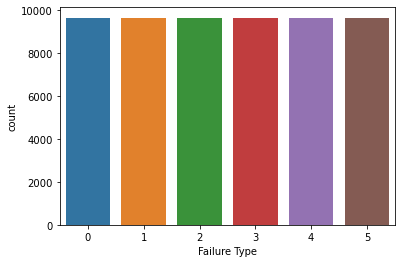

In [42]:
sns.countplot(data=df_new, x="Failure Type")
plt.show()

# Classification

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler

## Using K-NN

In [44]:
acc_KNN = []
kf = StratifiedKFold()
for fold, (trn_, val_) in enumerate(kf.split(X=df_new, y=y_res)):
    X_train = df_new.loc[trn_, feature_col]
    y_train = df_new.loc[trn_, target_col]
    
    X_valid = df_new.loc[val_, feature_col]
    Y_valid = df_new.loc[val_, target_col]
    
    ro_scaler = RobustScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    x_test_split = ro_scaler.transform(df[feature_col])
    
    clf = KNeighborsClassifier(n_neighbors=4)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test_split)
    
    print(f"The fold is : {fold}")
    print(classification_report(df[target_col].values, y_pred))

The fold is : 0
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       112
           1       1.00      0.94      0.97      9652
           2       0.51      1.00      0.68        78
           3       0.57      1.00      0.72        95
           4       0.13      1.00      0.23        18
           5       0.21      1.00      0.34        45

    accuracy                           0.95     10000
   macro avg       0.49      0.99      0.61     10000
weighted avg       0.98      0.95      0.96     10000

The fold is : 1
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       112
           1       1.00      0.93      0.96      9652
           2       0.52      1.00      0.68        78
           3       0.58      1.00      0.73        95
           4       0.09      1.00      0.16        18
           5       0.17      1.00      0.30        45

    accuracy                           0.93  

## SVM

In [45]:
acc_svm_rbf=[]
kf=StratifiedKFold(n_splits=5)
for fold, (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    X_train = df_new.loc[trn_,feature_col]
    y_train = df_new.loc[trn_,target_col]
    
    X_valid = df_new.loc[val_,feature_col]
    y_valid = df_new.loc[val_,target_col]
    
    ro_scaler = RobustScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    x_test_split = ro_scaler.transform(df[feature_col])
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test_split)
    
    print(f"The fold is : {fold} : ")
    print(classification_report(df[target_col].values, y_pred))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.40      0.99      0.56       112
           1       1.00      0.84      0.91      9652
           2       0.48      0.99      0.64        78
           3       0.52      1.00      0.69        95
           4       0.02      0.83      0.04        18
           5       0.08      0.98      0.15        45

    accuracy                           0.84     10000
   macro avg       0.42      0.94      0.50     10000
weighted avg       0.98      0.84      0.90     10000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.35      0.99      0.52       112
           1       1.00      0.82      0.90      9652
           2       0.49      0.99      0.65        78
           3       0.53      1.00      0.69        95
           4       0.02      0.83      0.03        18
           5       0.08      0.98      0.15        45

    accuracy                           

## Random Forest

In [46]:
acc_rf = []
kf = StratifiedKFold(5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_new, y=y_res)):
    X_train = df_new.loc[trn_, feature_col]
    y_train = df_new.loc[trn_, target_col]
    
    X_valid = df_new.loc[val_, feature_col]
    y_valid = df_new.loc[val_, target_col]
    
    ro_scaler = RobustScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    x_test_split = ro_scaler.transform(df[feature_col])
    
    clf = RandomForestClassifier(n_estimators=55,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(x_test_split)
    
    print(f"The fold is : {fold}")
    print(classification_report(df[target_col].values, y_pred))

The fold is : 0
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       112
           1       1.00      0.99      1.00      9652
           2       0.93      0.99      0.96        78
           3       0.90      1.00      0.95        95
           4       0.71      0.56      0.63        18
           5       0.56      0.93      0.70        45

    accuracy                           0.99     10000
   macro avg       0.85      0.90      0.87     10000
weighted avg       0.99      0.99      0.99     10000

The fold is : 1
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       112
           1       1.00      0.99      0.99      9652
           2       0.86      1.00      0.92        78
           3       0.89      1.00      0.94        95
           4       0.40      1.00      0.57        18
           5       0.48      1.00      0.65        45

    accuracy                           0.99  

# Naive Bayes

In [47]:
# from sklearn.naive_bayes import GaussianNB
# acc_nb = []
# kf = StratifiedKFold(5)
# for fold, (trn_, val_) in enumerate(kf.split(X=df_new, y=y_res)):
#     X_train = df_new.loc[trn_, feature_col]
#     y_train = df_new.loc[trn_, target_col]
    
#     X_valid = df_new.loc[val_, feature_col]
#     y_valid = df_new.loc[val_, target_col]
    
#     ro_scaler = RobustScaler()
#     X_train = ro_scaler.fit_transform(X_train)
#     X_valid = ro_scaler.transform(X_valid)
#     x_test_split = ro_scaler.transform(df[feature_col])
    
#     clf = GaussianNB()
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(x_test_split)
    
#     print(f"The fold is : {fold}")
#     print(classification_report(df[target_col].values, y_pred))